In [2]:
import  pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import time


import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
!python -V

Python 3.12.4


In [11]:
from ucimlrepo import fetch_ucirepo 

total_steps = 100  # Number of steps to complete
id = 602  # Dataset ID to fetch


with tqdm(total=total_steps, unit='%', desc=f"Fetching dataset ID: {id}") as pbar:
        for _ in range(total_steps):
            time.sleep(0.05)  # Simulate some delay for the progress bar
            pbar.update(1)  # Update progress bar by 1 step
            if _ == total_steps // 2:
                dry_bean = fetch_ucirepo(id=id) # fetch dataset
  
# data (as pandas dataframes) 
X = dry_bean.data.features 
y = dry_bean.data.targets


Fetching dataset ID: 602: 100%|██████████| 100/100 [00:23<00:00,  4.32%/s]


In [44]:
# with open('../data/dry_bean.csv', 'w') as f:
#     dry_bean.to_csv(f, index=False)

In [12]:
df = pd.concat([X, y], axis=1)
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRatio,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,Roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178,173.889,1.197,0.550,28715,190.141,0.764,0.989,0.958,0.913,0.007,0.003,0.834,0.999,SEKER
1,28734,638.018,200.525,182.734,1.097,0.412,29172,191.273,0.784,0.985,0.887,0.954,0.007,0.004,0.910,0.998,SEKER
2,29380,624.110,212.826,175.931,1.210,0.563,29690,193.411,0.778,0.990,0.948,0.909,0.007,0.003,0.826,0.999,SEKER
3,30008,645.884,210.558,182.517,1.154,0.499,30724,195.467,0.783,0.977,0.904,0.928,0.007,0.003,0.862,0.994,SEKER
4,30140,620.134,201.848,190.279,1.061,0.334,30417,195.897,0.773,0.991,0.985,0.971,0.007,0.004,0.942,0.999,SEKER


In [13]:
df.shape

(13611, 17)

In [14]:
print(f"Sum of null values in dataset: {df.isnull().sum().sum()}")

Sum of null values in dataset: 0


In [15]:
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRatio,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,Roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000,13611.000,13611.000,13611.000,13611.000,13611.000,13611.000,13611.000,13611.000,13611.000,13611.000,13611.000,13611.000,13611.000,13611.000,13611.000
mean,53048.285,855.283,320.142,202.271,1.583,0.751,53768.200,253.064,0.750,0.987,0.873,0.800,0.007,0.002,0.644,0.995
std,29324.096,214.290,85.694,44.970,0.247,0.092,29774.916,59.177,0.049,0.005,0.060,0.062,0.001,0.001,0.099,0.004
min,20420.000,524.736,183.601,122.513,1.025,0.219,20684.000,161.244,0.555,0.919,0.490,0.641,0.003,0.001,0.410,0.948
25%,36328.000,703.524,253.304,175.848,1.432,0.716,36714.500,215.068,0.719,0.986,0.832,0.762,0.006,0.001,0.581,0.994
50%,44652.000,794.941,296.883,192.432,1.551,0.764,45178.000,238.438,0.760,0.988,0.883,0.801,0.007,0.002,0.642,0.996
75%,61332.000,977.213,376.495,217.032,1.707,0.810,62294.000,279.446,0.787,0.990,0.917,0.834,0.007,0.002,0.696,0.998
max,254616.000,1985.370,738.860,460.198,2.430,0.911,263261.000,569.374,0.866,0.995,0.991,0.987,0.010,0.004,0.975,1.000


**Label Encoding**

The "Class" column contains string values, so we need to convert these labels into a numeric form using label encoding.

In [10]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df["Class"] = labelencoder.fit_transform(df['Class'])

<Axes: >

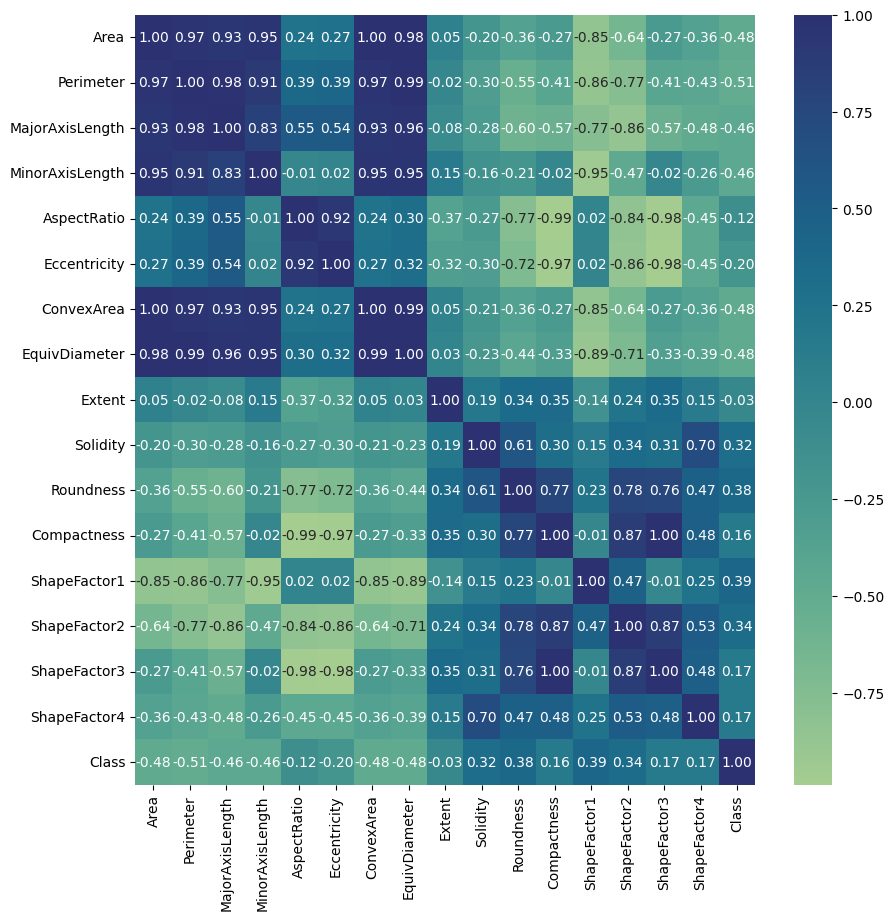

In [62]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='crest')

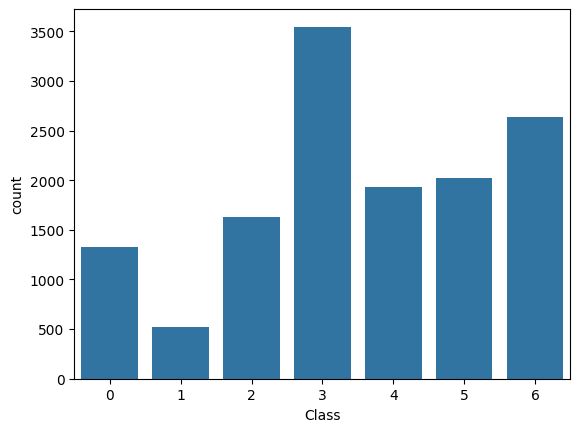

In [64]:
sns.countplot(x = 'Class', data=df)
plt.show()

In [45]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Split the data into features and label
X = df.drop(columns='Class')
y = df['Class']

# split dataset into train, test and validation
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify = y)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.4, random_state=42, stratify = y_temp)

In [46]:
print(f'X_train shape: {X_train.shape}, y_train: {y_train.shape}')
print(f'X_val shape: {X_val.shape}, y_val: {y_val.shape}')
print(f'X_test shape: {X_test.shape}, y_test: {y_test.shape}')

X_train shape: (9527, 16), y_train: (9527,)
X_val shape: (2450, 16), y_val: (2450,)
X_test shape: (1634, 16), y_test: (1634,)


#### Sampling techniques

In [47]:
# Our dataset has an imbalance in class labels. To prevent this from negatively impacting model performance, we need to address this issue.

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("After SMOTE:", len(X_train_res), len(y_train_res))


After SMOTE: 17374 17374


In [48]:
X_train_res.shape

(17374, 16)

#### Standardization

In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_res = scaler.fit_transform(X_train_res)
X_val = scaler.transform(X_val)

In [50]:
# Model training
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=10, 
                                random_state=42, 
                                max_depth=8, 
                                max_features=5, 
                                min_samples_leaf=5)

forest.fit(X_train_res, y_train_res)
y_pred = forest.predict(X_val)

In [52]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

print('Accuracy: %.5f' % accuracy_score(y_val, y_pred))
print(classification_report(y_val, y_pred, target_names=np.unique(labelencoder.inverse_transform(df["Class"]))))

Accuracy: 0.91878
              precision    recall  f1-score   support

    BARBUNYA       0.93      0.89      0.91       238
      BOMBAY       1.00      1.00      1.00        94
        CALI       0.93      0.93      0.93       293
    DERMASON       0.92      0.90      0.91       638
       HOROZ       0.97      0.96      0.96       347
       SEKER       0.92      0.94      0.93       365
        SIRA       0.85      0.88      0.87       475

    accuracy                           0.92      2450
   macro avg       0.93      0.93      0.93      2450
weighted avg       0.92      0.92      0.92      2450



In [61]:
type(X_train_res)

numpy.ndarray

In [56]:
from typing import Union
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, KFold

def random_search_hyperparameter_tuning_classification(X:Union[np.array, pd.DataFrame], y:pd.Series)->pd.DataFrame:
    param = {
        'Logistic_Regression': {
            'model': LogisticRegression(),
            'params': {
                'penalty': ['l1', 'l2', 'elasticnet'],
                'C': [0.01, 0.1, 1],
                'solver': ['newton-cg', 'lbfgs', 'liblinear']
            }
        },
        'Random_Forest': {
            'model': RandomForestClassifier(),
            'params': {
                'n_estimators': [10, 50, 100, 200],
                'max_features': ['auto', 'sqrt', 'log2'],
                'max_depth': [None, 10, 20, 30, 40, 50],
                'criterion': ['gini', 'entropy']
            }
        },
        'XGBoost': {
            'model': XGBClassifier(),
            'params': {
                'n_estimators': [50, 100, 150],
                'learning_rate': [0.01, 0.1, 0.2],
                'max_depth': [3, 5, 7, 9],
                'subsample': [0.6, 0.8, 1.0],
                'colsample_bytree': [0.6, 0.8, 1.0]
            }
        }
    }

    results = []

    kf = KFold(n_splits=5, shuffle=True, random_state=20)
    for key, values in param.items():
        random_search = RandomizedSearchCV(values['model'], values['params'], cv=kf, return_train_score=False, refit=True)
        random_search.fit(X, y)
        results.append({
            'model_name': key,
            'best_score': random_search.best_score_,
            'best_param': random_search.best_params_
        })
    return pd.DataFrame(results, columns=['model_name', 'best_score', 'best_param'])


In [57]:
random_search_hyperparameter_tuning_classification(X_train_res, y_train_res)

,model_name,best_score,best_param
0,Logistic_Regression,0.938,"{'solver': 'liblinear', 'penalty': 'l1', 'C': ..."
1,Random_Forest,0.957,"{'n_estimators': 200, 'max_features': 'sqrt', ..."
2,XGBoost,0.959,"{'subsample': 0.8, 'n_estimators': 100, 'max_d..."


In [ ]:
#mlflow.set_experiment("Kwizat-Haderach")

with mlflow.start_run():

    params = {"C": 0.1, "random_state": 42}
    mlflow.log_params(params)

    lr = LogisticRegression(**params)
    lr.fit(X_train_scaled, y_train)
    y_preds = lr.predict(X_test_scaled)

    mlflow.log_metric("accuracy", accuracy_score(y_test, y_preds)) 

    mlflow.sklearn.log_model(lr, artifact_path="models")

In [142]:
from mlflow import MlflowClient

#mlflow.get_artifact_uri()